# PIC 16A Penguin Species Classification Project 

By: Nishaanth Krishnan

## Section 0: Group Contributions Statement

All of us worked on cleaning the data. YuChen led Figure 1, Nishaanth led Figure 2, and Feng led Figure 3.  Nishaanth led the random forest model, YuChen led the Support Vector Machine model, and Feng led the K-Nearest Neighbors model. YuChen wrote the explanation of the figures, Nishaanth wrote the explanation of the first model and the discussion, and Feng wrote the explanation of the last two models. We worked on the automated feature selection and the functions to help us with modeling (Part 0) together. All three of us checked and revised each other's code and explanations for quality purposes. Everyone worked well during the project, and we felt that everyone was making good contributions. 

## Section 1: Importing and Cleaning the Data

In [191]:
# all of the neccesary libraries to be used
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

Our first task is to import the data from the website and to split it into training and testing datasets in order to prevent 
the testing dataset from being interfered and polluted with. 

In [192]:
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
# ensure reproducibility
np.random.seed(12345)
# splitting the data, with 20 percent of it being used for the testing
train,test=train_test_split(penguins,test_size=0.20, random_state = 12345)

In [193]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Our second task is to clean the data in order to make to easier to analyze the data. We created a function in order to 
avoid duplicating the same task for both the training and testing datasets. 

In [194]:
def clean_data(data):
    """
    The purpose of this function is to clean
    the penguins data, data which is a dataframe. Filters
    out unncessary columns, eliminates penguins that are NA, 
    and shortens the species name for easier comprehension. 
    """
    #in order to modify a data frame inside a function we need to copy it
    df=data.copy()
    # filtering out uneccesary columns
    cols = ["Species",  
            "Island", 
            "Culmen Length (mm)", 
            "Culmen Depth (mm)", 
            "Sex",
            "Flipper Length (mm)",
            "Body Mass (g)",
            "Delta 15 N (o/oo)",
            "Delta 13 C (o/oo)"]

    # select a subset of columns
    df = df[cols]

    # shorten the species name
    df["Species"] = df["Species"].str.split().str.get(0)
    # delete penguins with species being NA
    df = df.dropna(subset = ["Sex"])
    # dropping penguin with sex of "."
    df = df[df['Sex']!='.']
    return(df)

In [195]:
train = clean_data(train)
test = clean_data(test)
train.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Sex,Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
154,Chinstrap,Dream,51.3,19.2,MALE,193.0,3650.0,9.29078,-24.75570
99,Adelie,Dream,43.2,18.5,MALE,192.0,4100.0,8.97025,-26.03679
254,Gentoo,Biscoe,49.1,14.8,FEMALE,220.0,5150.0,7.89744,-26.63405
202,Chinstrap,Dream,48.1,16.4,FEMALE,199.0,3325.0,9.46929,-24.48403
54,Adelie,Biscoe,34.5,18.1,FEMALE,187.0,2900.0,8.41837,-26.54718


## Section 2: Exploratory Analysis

In this section, we will explore our training data and make some figures to help us gain an understanding of the data in order to determine what features could be best for classifying the species of penguin. 

### Table 1

Our first task will be to create a table to look at the characteristics of each species. 

In [196]:
# cleaning the original penguins dataset 
# to use for exploratory analyis
# creating a table to look at mean feature values
# for each species grouped by sex, which is 
# in grouped by island
train.groupby(["Species", "Sex", "Island"])[["Culmen Length (mm)", 
                                             "Culmen Depth (mm)", 
                                             "Flipper Length (mm)", 
                                             "Body Mass (g)", 
                                             "Delta 15 N (o/oo)", 
                                             "Delta 13 C (o/oo)"]].mean().round(1)

Culmen Length (mm)  Culmen Depth (mm)  \
Species   Sex    Island                                             
Adelie    FEMALE Biscoe                   37.0               17.6   
                 Dream                    36.9               17.4   
                 Torgersen                37.7               17.5   
          MALE   Biscoe                   40.7               19.0   
                 Dream                    40.2               18.7   
                 Torgersen                40.1               19.3   
Chinstrap FEMALE Dream                    47.1               17.6   
          MALE   Dream                    51.0               19.2   
Gentoo    FEMALE Biscoe                   45.6               14.3   
          MALE   Biscoe                   49.6               15.7   

                            Flipper Length (mm)  Body Mass (g)  \
Species   Sex    Island                                          
Adelie    FEMALE Biscoe                   186.7         3321.7   
                 Dream                    188.0         3336.4   
                 Torgersen                188.3         3419.0   
          MALE   Biscoe                   189.7         4022.4   
                 Dream                    192.1         4067.0   
                 Torgersen                194.9         4021.4   
Chinstrap FEMALE Dream                    192.2         3519.0   
          MALE   Dream                    200.0         3936.2   
Gentoo    FEMALE Biscoe                   213.1         4697.0   
          MALE   Biscoe                   221.5         5488.0   

                            Delta 15 N (o/oo)  Delta 13 C (o/oo)  
Species   Sex    Island                                           
Adelie    FEMALE Biscoe                   8.8              -26.0  
                 Dream                    8.8              -25.8  
                 Torgersen                8.7              -25.8  
          MALE   Biscoe                   8.9              -25.9  
                 Dream                    9.0              -25.8  
                 Torgersen                8.9              -25.9  
Chinstrap FEMALE Dream                    9.3              -24.6  
          MALE   Dream                    9.5              -24.5  
Gentoo    FEMALE Biscoe                   8.2              -26.3  
          MALE   Biscoe                   8.3              -26.2

This table shows mean values for features for each species, sex, and island combination of penguin. The first thing that stood out to us was that the Delta 15N and Delta 13C values seem to be very similar for all such combinations. So we think these two features may not be good choices for when we try and classify the species of penguin. The other 4 features do show some discernbility between species of penguin. Gentoo penguins seem to have a higher body mass but lower culmen depth,  and Adelie and Chinstrap penguins tend to have smaller culmen lengths and flipper lengths. These four features are the ones that we will be focusing on in our figures. 

### Figure 1

The first feature we wanted to explore was the body mass, as it seemed to us that it was the feature that could potentially
be the best in differniating between species of penguin. 

[Text(0.5, 1.0, 'Figure 1: Penguin Body Mass')]

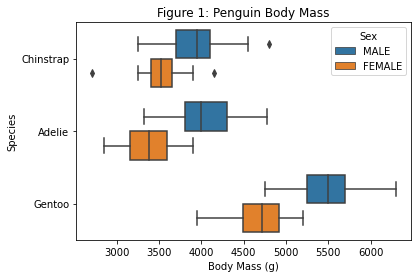

In [197]:
# creating a scatterplot to visualize body mass
# for each species grouped by sex
Figure1 = sns.boxplot(data = train, 
                    x = 'Body Mass (g)', 
                    y = 'Species', 
                    hue = 'Sex', 
                    dodge = True)
Figure1.set(title = "Figure 1: Penguin Body Mass")

This box plot shows that the Gentoo Penguin has a far higher average mass than the other two penguin species for both male and female. Meanwhile, the female body mass of the Adelie and Chinstrap are relatively close, with Chinstraps having the slightly larger females than Adelie. However, the median of of the male Adelie seems to be slightly larger than male chinstraps, with the male Adelie also having a larger maximum size.  Overall, male penguins have higher body mass than females; this coupled with how 
the Gentoo penguin has a higher mass indicates that body mass is a good feature for us to predict what species of penguin a given penguin is. 

### Figure 2

We will next make a visualization histogram to look at the count of penguins with 
some of the features for different species. Since the delta features seem to be too similar for all of the species of penguin, we ruled out those features for our model. 

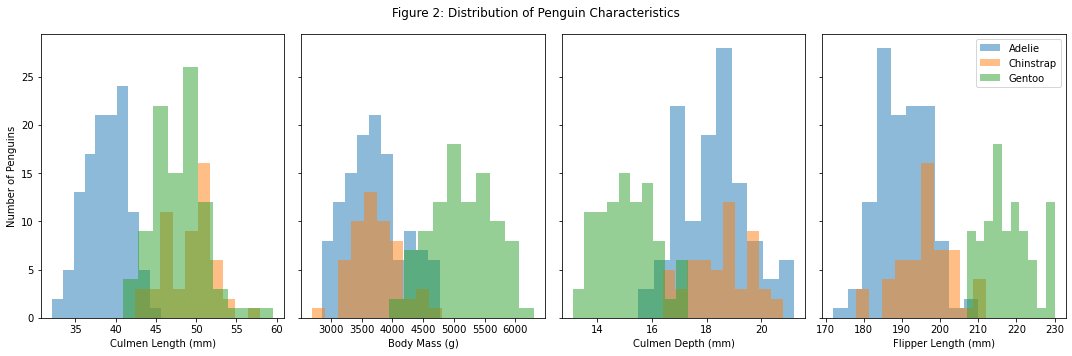

In [164]:
def drawhis(df, cols):
    """
    The purpose of this function is to draw a series of
    histograms for a number of the features, and labelled
    seperately by species. Takes in the penguins data, df, 
    and the desired cols, or list of features and plots the histograms. 
    Plots one histogram for each feature in cols with each species
    visualized seperately. 
    """
    # creating 4 subplots, having them share y axis
    fig, ax = plt.subplots(1,4, figsize = (15,5), sharey = True)
    # iterating thru the cols and the species
    for i in range(len(cols)):
        for s in ['Adelie', 'Chinstrap', 'Gentoo']:
            # filtering the df for each species
            sub=train[train["Species"]==s]
            # filtering df for each feature in the cols
            sub=sub[cols[i]]
            # creating the histogram
            ax[i].hist(sub,label=s.split(' ')[0], alpha=0.5)
            # labelling the histogram
            ax[i].set(xlabel = cols[i])
            ax[0].set(ylabel = "Number of Penguins")
            plt.tight_layout()
            # creating a title
            plt.suptitle("Figure 2: Distribution of Penguin Characteristics")
            
# applying the function to the desired column
fig, ax = plt.subplots(1,4, figsize = (15,5), sharey = True)
drawhis(train, ["Culmen Length (mm)", "Body Mass (g)", 
                   "Culmen Depth (mm)","Flipper Length (mm)"])
# creating a legend
plt.legend()


From this histogram we can see that Culmen Length might be a good feature to decide the species of the penguins because the length is very different for Adelie and Gentoo. A similar trend is seen with the other 4 variables. But it does seem that Chinstrap and Adelie penguins are pretty similar. Overall, all four features seem to be good candidates for use in our model.

### Figure 3

Then, the next thing is to draw scatterplots for the penguins dataset which will be our third figure. We picked to plot culmen 
length on the x axis and two variables (body mass and culmen depth). Based on our obersevations so far, we think these variables might be good in differentiating between species of penguin. 

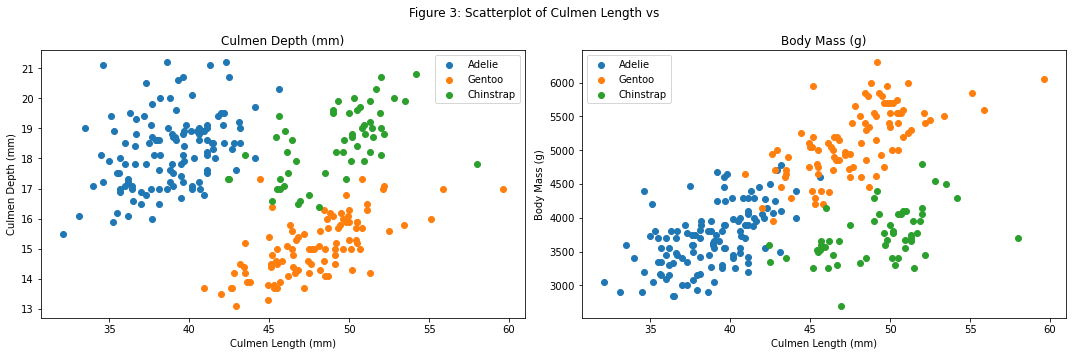

In [199]:
# creating the plot
fig, ax = plt.subplots(1,2, figsize = (15,5))
# setting which features and and the species
cols = ['Culmen Depth (mm)', 'Body Mass (g)']
species = ['Adelie', 'Gentoo', 'Chinstrap']
# iterating through the cols and species
for col in range(len(cols)):
    for s in range (len(species)):
        # filtering the penguins df 
        # for each species
        # so that each species is different color
        sub = train[train["Species"]==species[s]]
        # making a scatterplot with entry of the features of column
        # as y axis and culmen length as x axis
        ax[col].scatter(sub['Culmen Length (mm)'],sub[cols[col]])
        # setting title, labels
        ax[col].set(xlabel = 'Culmen Length (mm)', 
                   ylabel = cols[col], 
                   title = cols[col])
        # creating a legend for each subplot
        ax[col].legend(species)
# creating an overall title for the figure
plt.suptitle("Figure 3: Scatterplot of Culmen Length vs ")
plt.tight_layout()

From these two scatterplots, we can see a relative trend of clustering for each group. 
This shows that features such as Culmen Depth in combination with culmen depth and body mass might be good candidates for the
variables we end up using in the model. 



## Section 3: Feature Selection

In this section, we will use automated feature selection to select the best combination of three features for eventually modelling the data.

While we have identified several features like culmen depth and body mass that might be good candidiates for our model to classify the species of penguin, we decided to go ahead and use automated feature selection to select the best features for our model. The way how this is works is that we will specifiy a list of combinations of features, and a function will calculate the cross-validation score, a measure of how well the model does on those features, and will return the best combination of features (that has the highest mean cross validation score). 
For our model choice, we decided to use Random Forest, K-Nearest Neighbors, and Support Vector Machine. 

For the features, we will use Sex as our qualitative variable (we decided to stick with Sex as our quantitative variable in order to have at least one feature be shared between all 3 models for the sake of some consistency and comparison), and for the other two variables, we will use a combination of culmen length, culmen depth, body mass, and flipper length (we found these to be features that could be good candidiates). Hence, there will be a total of 6 combinations. 

For our model choice, we decided to use Random Forest, K-Nearest Neighbors, and Support Vector Machine. 

In [200]:
# encoding the penguins data to use for eventual use in finding the 
# best cross validation score
def encode_data(df):
    """
    The purpose of this function is to encode qualitative variables
    in the penguins data df. Encodes the columns island, species, and
    sex using LabelEncoder and returns the dataframe with
    the encoded values. 
    """
    # copying the data for modification
    df = df.copy()
    # using the label encoder to encode island, species, 
    # sex which are the quantitive variables to be used
    le = preprocessing.LabelEncoder()
    df['Island'] = le.fit_transform(df['Island'])
    df['Species'] = le.fit_transform(df['Species'])
    df['Sex'] = le.fit_transform(df['Sex'])
    return (df)

In [201]:
# encoding the training data
# and creating an x train and y train
# for the entire dataset
clean_train = encode_data(train)
X_train = clean_train.drop(['Species'], axis = 1)
y_train = clean_train['Species']
X_train.head()

,Island,Culmen Length (mm),Culmen Depth (mm),Sex,Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
154,1,51.3,19.2,1,193.0,3650.0,9.29078,-24.75570
99,1,43.2,18.5,1,192.0,4100.0,8.97025,-26.03679
254,0,49.1,14.8,0,220.0,5150.0,7.89744,-26.63405
202,1,48.1,16.4,0,199.0,3325.0,9.46929,-24.48403
54,0,34.5,18.1,0,187.0,2900.0,8.41837,-26.54718


In [202]:
def top_cv_score(X,y, m):
    """
    The purpose of this function is to calculate the best choice of features for a 
    given model based on its mean cross validation score. Takes in data X and y
    (X is predictor data, y is the target data) as well as the desired machine
    learning model. Calculates the mean cross validation score for each the choices
    and stores it in dictionary, and returns a tuple with the choice with best
    mean cross validation score. 
    """
    # creating an empty dict where key is the choice
    # of 3 features and the value is cross val score 
    # for that combination of features
    cv_dict = {}
    # listing out the choices
    choices = [['Sex','Culmen Length (mm)','Culmen Depth (mm)'],
               ['Sex','Culmen Length (mm)','Flipper Length (mm)'],
               ['Sex','Culmen Length (mm)','Body Mass (g)'],
               ['Sex','Culmen Depth (mm)','Flipper Length (mm)'],
               ['Sex','Culmen Depth (mm)','Body Mass (g)'],
               ['Sex','Flipper Length (mm)', 'Body Mass (g)']]           
    # iterating thru the choices
    for choice in choices:
        # making the choice as a tuple for simplicity in 
        # creating the dict
        choice_t = tuple(choice)
        # storing the mean cross validation score for each key of feature
        # choices
        cv_dict[choice_t] = cross_val_score(m, X[choice], y, cv = 5).mean()
    # returning the key value pair with the highest cv score
    return max(cv_dict.items(), key = lambda k : k[1])

    

We will now use our function on the three 3 models we decided on. 

In [204]:
# applying the function to the Random Forest Classifier
rf = RandomForestClassifier()
top_cv_score(X_train,y_train,  rf)

(('Sex', 'Culmen Length (mm)', 'Body Mass (g)'), 0.9850454227812717)

In [205]:
# applying the function to K-nearest neighbors classifier
KN = KNeighborsClassifier()
top_cv_score(X_train,y_train, KN)

(('Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'), 0.9701607267645003)

In [206]:
# applying the function to the Support vector machine
SVM = svm.SVC()
top_cv_score(X_train,y_train, SVM)

(('Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'), 0.8469601677148848)

For the Random Forest Classifier, the combination of sex, culmen length, and body mass, had the best cross validation score 
with a score of 0.985. For the K-Nearest Neighbors Classifier, the combination of Sex, Culmen Length, and Culmen Depth had 
the best cross-validation score with a score of 0.970. For the Support Vector Machine, the combination of sex, culmen length, 
and culmen depth had the best cross validation score of 0.847. Therefore, we will use sex, culmen length, and body mass
for our Random Forest model, and sex, culmen length, and culmen depth for our K-Nearest Neighbor and Support Vector Machines
models. Not suprisingly, this validated our observations in the explanatory analysis, as these were the ones that we found to have values that differentiated them from different species. 

## Section 3 Modeling 

In this section, we will use 3 different machine learning models to try and predict penguin species.

### Part 0: Functions

Before modelling, we created some functions to help us further prepare the data for modeling, use cross validation to determine best parameters to use for each model, and to help analyze the results without having to repeat code. We also created another  table to visualize the mean values for the features grouped by species and sex in order to help us with analyzing where the model went wrong. 

In [207]:
def prep(df, cols):
    """
    Prepares the data to be ready for modelling. Takes in a df, 
    either training or testing data, as well as the columns used
    (the features we are using for the model) which is a list. 
    Encodes the data,
    filters the data to only the neccesary features, and splits the 
    data into X, the predictor variables, and y is what we are
    trying to predict. Returns the dataframes X and y
    """
    # copying the df to modify it
    df = df.copy()
    # encoding the qualtitive variables 
    # using encode data function from above
    df = encode_data(df)
    # filtering df to only those columns 
    # specified (that will be used in the model)
    df = df[cols]
    # splitting data into X and y
    # where X are the predictor variables
    # and y is what we are trying to predict, 
    # species
    X = df.drop(['Species'], axis = 1)
    y = df['Species']
    return X, y

In [235]:
def best_parameter(X_train, y_train,model):
    """
    The purpose of this function is to find the best complexity parameter 
    for our model, which has the best mean cross validation score
    This is the maximum depth in the random forest, 
    the number of nearest neighbors in the K-Nearest Neighbors model, 
    and the regularization parameter, C, in the Support Vector Machines model. 
    Takes in dataframes X_train, and y-train the training data, as well as the 
    desired model (rf - Random Forest, KN - k-nearest neighbors, SVM - support
    vector machines). Returns the best parameter and its cross validation score, 
    and makes a plot to visualize the parameter vs the mean cross validation score
    """
    # creating a plot to visualize the trend as the parameter increases
    fig, ax = plt.subplots(1, figsize = (6, 5))
    # setting the top parameter and top score as intital values
    top_param = 1
    top_score = 0
    # iterating thru t range 1 to 10
    for t in range(1, 11):
        # calling the model with the parameter as t
        if model == rf:
            m = RandomForestClassifier(max_depth = t, random_state = 12345)
            parameter = 'Max Depth'
        elif model == KN:
            m = KNeighborsClassifier(n_neighbors = t)
            parameter = 'N-Neighbors'
        elif model == SVM:
            m = svm.SVC(C = t)
            parameter = 'C Value - Regularization Parameter'
        # calculating ,mean cross val score with t and the training data
        score = cross_val_score(m, X_train, y_train).mean()
        # plotting it on the plot
        ax.scatter(t, score)
        # finding the parameter, max depth
        # with the highest cross validation score
        if score > top_score:
            top_param = t
            top_score = score
    # setting labels for the plot
    ax.set(xlabel = parameter,
           ylabel = 'Cross Validiation Score', 
           title = parameter + " vs Cross Validation Score")
    # printing the best parameter and its cross val score
    print("Best parameter: "+str(top_param)+"; Has CV score of "+str(top_score))

In [241]:
def error_table(X_test, y_test, m):
    """
    Creates an dataframe (table) with the penguins that the model
    incorrectly classified. Takes in dataframes X_test
    and y_test, the testing data, and fitted model m. A dataframe
    with the incorrectly classified penguins is returned with the 
    values for sex and and species decoded back to the original labels
    """
    y_test_predict = m.predict(X_test)
    # finding the predicted species values
    # mask to get values where the predicted
    # and actual species are not equal
    errors = y_test_predict != y_test
    # creating a dataframe by filtering the test data
    # to only penguins that are incorrectly classified
    error_table = X_test[errors]
    # creating new columns to show actual and predicted species
    error_table["Actual Species"] = y_test[errors]
    error_table["Predicted Species"] = y_test_predict[errors]
    # changing encoded values back to original names for clarity
    # chinstrap 1, adelie  0,  gentoo 2
    error_table["Actual Species"].replace({0: "Adelie", 
                                           1: "Chinstrap", 
                                           2:'Gentoo'}, 
                                          inplace=True)
    error_table["Predicted Species"].replace({0: "Adelie", 
                                              1: "Chinstrap", 
                                              2:'Gentoo'}, 
                                             inplace=True)
    error_table["Sex"].replace({0: "F", 1: "M"}, inplace=True)

    return error_table

In [210]:
def cm(model, X_test, y_test):
    """
    Creates a confusion matrix to visualize
    the performance of a model; to see
    where it made mistakes and where it had successes.
    Takes in the fitted model (that has already been fitted on entire 
    training data)
    and the testing dataframes X_test and y_test. 
    Returns the confusion matrix, in a seaborn heatmap
    form for better visual clarity.
    """
    # getting predictions by using provided
    # model to predict species for X testing data
    y_test_predict = model.predict(X_test) 
    # creating confusion matrix using predictions
    # and true testing data y test
    c_m  = confusion_matrix(y_test, y_test_predict)
    # making it in heatmap form and labelling
    c_m = sns.heatmap(c_m, annot=True)
    c_m.set(xlabel = "Predicted Value", ylabel = "Actual Value")
    return c_m

In [277]:
def plot_regions(model, X,y, cols):
    """
    Creates a decision region plot to visualize
    how a model visualized and predicted the data. 
    Takes in a fitted model (that has already been fitted
    on the entire training dataset), model, the dataframes
    X and y (can be training or testing data), and the cols
    or the list of features used in that model. 
    Returns two decision region
    plots one for each sex. 
    """
    # creating the figure and setting x0 and x1 
    # to be the two quantitative variables
    fig, ax = plt.subplots(1,2,figsize=(15,7))
    x0 = X[cols[0]]
    x1 = X[cols[1]]

    # creating the grids
    # this is done in order to predict the species
    # of each point in the plot so that is color coded
    # to form a solid region
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    # grid z is the sex variable, with an array of 0 and 1s created
    # matches with how the sex is 0 for female, 1 for male
    # neccesary as our model uses three features to predict penguin
    # species and sex is the third one
    grid_z = np.array([0,1])
    # making a meshgrid of the three gridsin order 
    # to approx loc of each point
    xx, yy,zz = np.meshgrid(grid_x, grid_y, grid_z)
    # in order to make predictions for each point in the plot
    # we must convert xx, yy, zz to an 1D array
    # array ravel converts the 3d array into 1D array
    # then model predictions are extracted using np.c_ by joining
    # the parts of the grid
    XX = xx.ravel()
    YY = yy.ravel()
    ZZ = zz.ravel()
    # in order to predictions need one array, so concactenating 
    # XX, YY, and ZZ, into one XYZ array using np.c
    XYZ=np.c_[XX,YY,ZZ]
    # getting the predictions
    p = model.predict(XYZ)
    # array.reshape() used to convert predictions p back to 3D
    p = p.reshape(xx.shape)
    # creating the contour plot, with 0 for female, 1 for male
    # extracting the values from the xx, yy, zz for the coordinates of
    # of the contour; 
    # this is because the third dimension provided has the sex attribute
    # for the points (0 for females, 1 for males)
    ax[0].contourf(xx[:,:,0], yy[:,:,0], p[:,:,0], cmap = "jet", alpha = 0.20)
    ax[1].contourf(xx[:,:,1], yy[:,:,1], p[:,:,1], cmap = "jet", alpha = 0.20)
    # data is then plotted, first subplot for females, 2nd for males
    # masks for male anf emale
    female = X['Sex'] == 0
    male = X['Sex'] == 1
    ax[0].scatter(x0[female], x1[female], c = y[female], cmap = "jet")
    ax[1].scatter(x0[male],x1[male],c=y[male],cmap="jet")
    # setting labels for the plot
    ax[0].set(xlabel = cols[0], ylabel = cols[1], title="Female Penguins")
    ax[1].set(xlabel = cols[0], ylabel = cols[1], title="Male Penguins")
    # creating a legend
    # setting colors manually
    adelie = mpatches.Patch(color='darkblue', label='Adelie')
    chinstrap = mpatches.Patch(color='lawngreen', label='Chinstrap')
    gentoo = mpatches.Patch(color='maroon', label='Gentoo')
    plt.legend(handles=[adelie, chinstrap, gentoo], loc = 'center right', 
               bbox_to_anchor=(1.22, 0.5))
    
    plt.tight_layout()

In [213]:
# creating another table to help us with our error analysis
# grouped by species and sex (to correspond with decision region)
# and with only features used 
# in modelling
train.groupby(["Species", "Sex"])[["Culmen Length (mm)", 
                                    "Culmen Depth (mm)", 
                                    "Body Mass (g)"]].mean().round(1)

Culmen Length (mm)  Culmen Depth (mm)  Body Mass (g)
Species   Sex                                                         
Adelie    FEMALE                37.2               17.5         3362.5
          MALE                  40.3               19.0         4037.9
Chinstrap FEMALE                47.1               17.6         3519.0
          MALE                  51.0               19.2         3936.2
Gentoo    FEMALE                45.6               14.3         4697.0
          MALE                  49.6               15.7         5488.0

### Part 1: Random Forest

Our first model is the Random Forest model. The way how the Random Forest model works is that it is a ensemble prediction of
a bunch of decision trees (which are simple algorithms that predict the species based on understanding the trends in the data and using probability to determine the species). So the classification provided by the random forest is like an "average" of the predictions 
all of these decision trees. We will be using Sex, Culmen Length, and Body Mass to try and predict the species of a penguin. 

Our first task is to prepare the train and the test data for modeling. Using the prep function introduced above, 
qualitative variables are encoded and the dataframe is filtered to have only the variables we need for this model. Both the 
training and testing data are split into X and y, where X being the predictor variables (Sex, Culmen Length, and Body Mass) 
and y being what we are trying to predict. 

In [214]:
# preparing the data for modelling
# using prep function
# splitting the data as well into X and y
# here in X1, y1 refers to how random forest is 1st model
# train is training, test is testing data
X1_train, y1_train = prep(train, ['Species',
                                  'Culmen Length (mm)',
                                  'Body Mass (g)', 'Sex'])
X1_test, y1_test = prep(test, ['Species',
                               'Culmen Length (mm)',
                               'Body Mass (g)', 'Sex'])
X1_train.head()

,Culmen Length (mm),Body Mass (g),Sex
154,51.3,3650.0,1
99,43.2,4100.0,1
254,49.1,5150.0,0
202,48.1,3325.0,0
54,34.5,2900.0,0


Our second task is to determine the best complexity parameter for our random forest model, the maximum depth. Using a similar approach
as seen with our automated feature classification, we will try and iterate through a series of max depths (from 1 to 10),
and use whichever one yields the highest cross validation score. 

Best parameter: 5; Has CV score of 0.9812718378756115


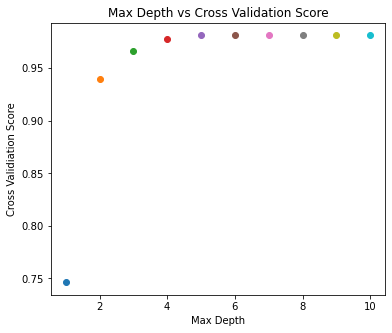

In [236]:
# finding the best max depth for random forest model
best_parameter(X1_train, y1_train,rf)

As illustrated above, the optimal max depth seems to be 5 as it has the highest cross validation score. Hence, we will be using that in our model. 

Our next task, and the most important, is to fit the model on our training data and evaluating its performance on the test data. We will do that below.  

In [216]:
# calling the random forest classifier with the max depth
# being the top value shown in the graph of 5
rf = RandomForestClassifier(max_depth = 5, random_state = 12345)
# fitting the model on training data
rf.fit(X1_train, y1_train) 
# evaluating the model on the testing data
rf.score(X1_test, y1_test)

0.9846153846153847

It looks like our random forest model's performance on the test data was 98.4%. This means it was able to correctly classify the species of
penguin 98.4 percent of the time! For the vast majority of penguins in our testing dataset, it was correctly able to identify the species. 


However, it is important that we understand where our model went wrong. We will first use a confusion matrix to do this. 

<AxesSubplot:xlabel='Predicted Value', ylabel='Actual Value'>

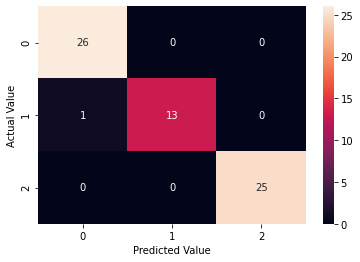

In [217]:
# creating the confusion matrix
cm(rf, X1_test, y1_test)

Looking at the confusion matrix above, the diagonal are the penguins where the species was correctly identified (where predicted and actual values are equal). The non diaganol entries are where the model made a mistake. 
Most of the non diaganol entries are 0, except for 1, where there is a value of one (the predicted value is 0, the actual value is 1). This indicates there was one penguin that was incorrectly classified as some other species. 

We can visualize this by creating a decision region plot to visualize what the model "saw" when analzying the data.

First, let us look at what the model saw on the training data. 

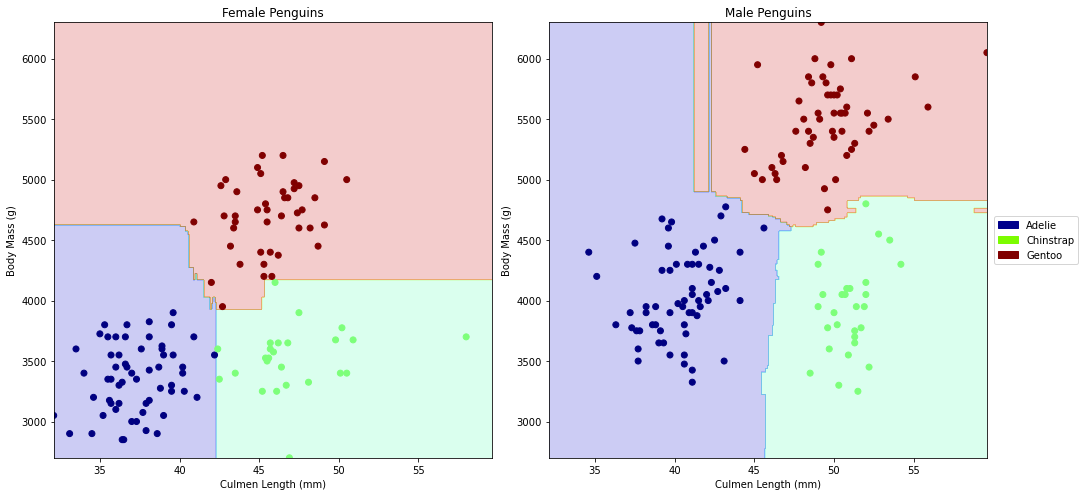

In [278]:
# decision region on training data 
plot_regions(rf, X1_train, y1_train, ['Culmen Length (mm)', 'Body Mass (g)'])

The decision region plots above show how the fitted random forest model viewed the training data. The penguins (the points) are plotted according to their culmen length and body mass, and are color coded for their true species. The model's view of the data is shown in the colored regions. For example, a green dot in the green region means that the model correctly "thinks" that a chinstrap penguin is a chinstrap penguin. Mistakes are observed when a point is not in its respective color region. For example, a green dot in the blue region is an indication that the model "thought" that a Chinstrap penguin (green) was an Adelie penguin (blue).

The model did an excellent job of correctly classifying the training data. Most penguins are in their respective color regions. 
However, it seems as though the Random Forest model was confused when dealing with female chinstrap and female adelie penguins, 
as they tend to have similar body masses and culmen lengths. This is because there does seem to be some overlap between female Adelie and female Chinstrap penguins.  

Let us now look at the decision regions for the testing data. 

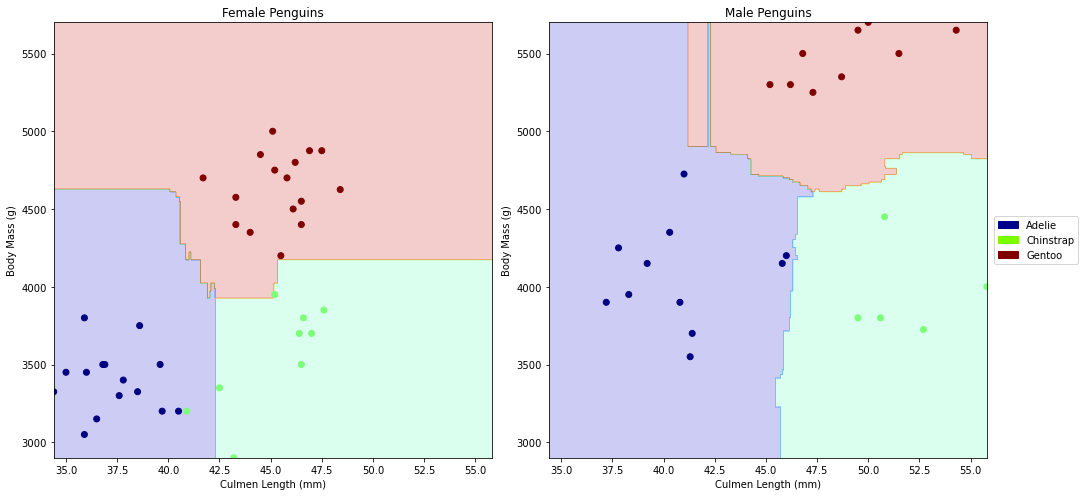

In [279]:
# decision region for testing data
plot_regions(rf, X1_test, y1_test, ['Culmen Length (mm)', 'Body Mass (g)'])

Looking at the decision region plots above, this validates what we saw in the plots for the training data and in the confusion matrix. In the testing data, 
it looks like one female chinstrap penguin was incorrectly labelled as an Adelie Penguin (the green dot in the blue region), which could be a results of having a similar culmen length and body mass of an Adelie penguin. However, it should also be noted that the model did an excellent job of labelling Gentoo penguins as all of them were correctly classified. We feel this is a result of the fact that they have higher body masses than the other penguins. 

We then made a table to look at this incorrectly labelled penguin and its values.

In [243]:
# creating table of errors 
error_table(X1_test, y1_test, rf)

,Culmen Length (mm),Body Mass (g),Sex,Actual Species,Predicted Species
182,40.9,3200.0,F,Chinstrap,Adelie


It looks like this female Chinstrap penguin has a culmen length of 40.9 mm. This seems to be much lower than the average female 
Chinstrap penguin culmen length of 47.1 mm. This may be why it was classified as an Adelie penguin, which have lower
culmen lengths (the  female Adelie Penguin have an average culmen length of around 37.1 mm). Another possible reason is that its body mass is relatively low for a Chinstrap penguin and more closely resembles that of an Adelie penguin. This penguin's body mass of 3200 grams is closer to the average body mass of a female Adelie penguin of 3362.5 g than that of a female chinstrap penguin of 3519 grams. We can see this in visual form in the decision region plot as this penguin was plotted in the Adelie region (blue) as its measurements are more indicative of an Adelie penguin. Overall, because its culmen length and body mass resembles that of an Adelie female, this female Chinstrap penguin was misclassified. 

 ### Part 2: K-Nearest Neighbors

Our first model is the K-Nearest Neighbors model. The way how the K-Nearest Neighbors model works is that KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.. So we will calculate the distance between points for the model. We will be using Sex, Culmen Length, and Culmen Depth to try and predict the species of a penguin.

Our first task is to prepare the train and the test data for modeling. Using the prep function introduced above, qualitative variables are encoded and the dataframe is filtered to have only the variables we need for this model. Both the training and testing data are split into X and y, where X being the predictor variables (Sex, Culmen Length, and Culmen Depth) and y being what we are trying to predict.

In [221]:
# preparing the testing using prep function
X2_train, y2_train = prep(train, ['Species',
                                  'Culmen Length (mm)',
                                  'Culmen Depth (mm)', 'Sex'])
X2_test, y2_test = prep(test, ['Species',
                               'Culmen Length (mm)',
                               'Culmen Depth (mm)', 'Sex'])
X2_train.head()

,Culmen Length (mm),Culmen Depth (mm),Sex
154,51.3,19.2,1
99,43.2,18.5,1
254,49.1,14.8,0
202,48.1,16.4,0
54,34.5,18.1,0


Our second task is to determine the best complexity parameter for our K-Nearest Neighbor model, the N neighbors. Using a similar approach as seen with our automated feature classification, we will try and iterate through a series of N_neighbours (from 1 to 10), and use whichever one yields the highest cross validation score.

Best parameter: 1; Has CV score of 0.9814814814814815


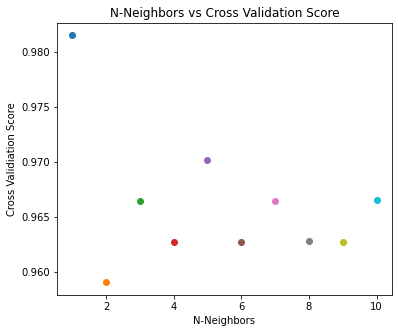

In [245]:
# finding the best possible n neighbor for our model
best_parameter(X2_train, y2_train, KN)

As illustrated above, the optimal N_neighbor seems to be 1 as it has the highest cross validation score. Hence, we will be using that in our model.

Our next task, and the most important, is to fit the model on our training data and evaluating its performance on the test data. We will do that below.

In [223]:
# fitting the model on the training dataset and
# seeing its performance on the testing data
KN = KNeighborsClassifier(n_neighbors = 1)
KN.fit(X2_train, y2_train) 
KN.score(X2_test, y2_test)

0.9692307692307692

It looks like our random forest model's performance on the test data was 96.9%. This means it was able to correctly classify the species of penguin 96.9 percent of the time! For the vast majority of penguins in our testing dataset, it was correctly able to identify the species.

However, it is important that we understand where our model went wrong. We will first use a confusion matrix to do this.

<AxesSubplot:xlabel='Predicted Value', ylabel='Actual Value'>

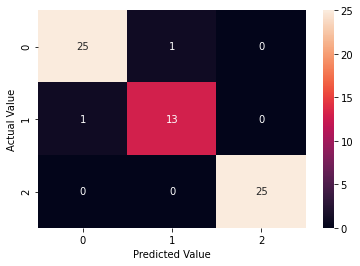

In [224]:
# creating confusion matrix
cm(KN, X2_test, y2_test)

Looking at the confusion matrix above, the diagonal are the penguins where the species was correctly identified. Most of the non diaganol values (the mistakes) are 0, except for 1, where there is two values of one. This indicates there were two penguins that was incorrectly classified as some other species.

We can visualize this by creating a decision region plot to visualize what the model "saw" when analzying the data.

First, let us look at what the model saw on the training data.

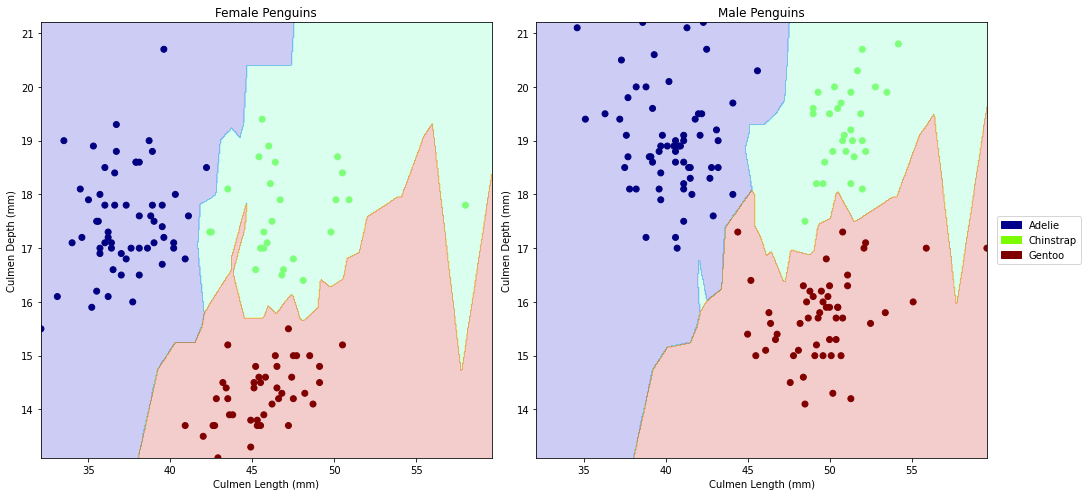

In [280]:
# decision region for training data
plot_regions(KN, X2_train, y2_train, ['Culmen Length (mm)', 'Culmen Depth (mm)'])

The model did a pretty good job of correctly classifying the training data. All penguins are in their respective color regions. 
Let us now look at the decision regions for the testing data. In order to find our mistakes, we must look further at the testing data.

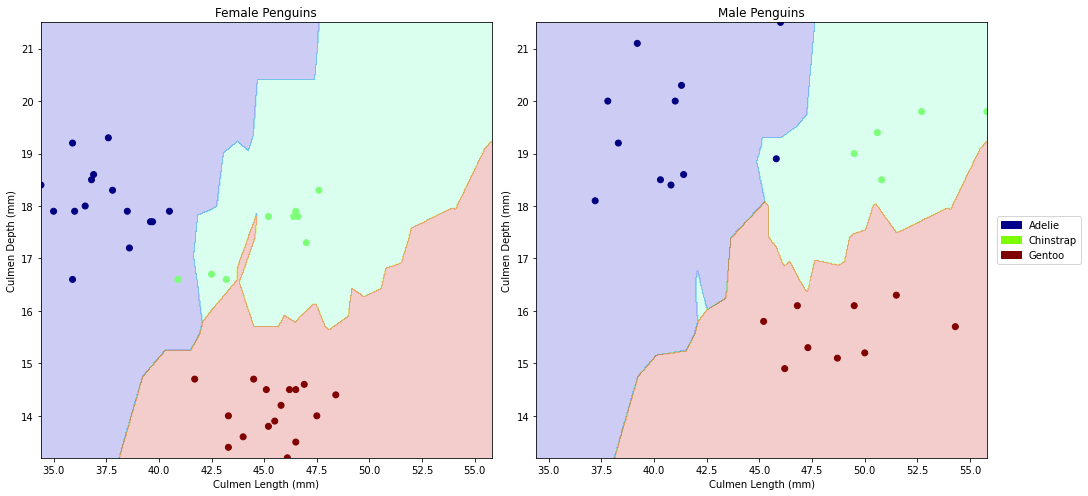

In [281]:
# decision region for testing data
plot_regions(KN, X2_test, y2_test, ['Culmen Length (mm)', 'Culmen Depth (mm)'])

Looking at the decision region plots above, this validates what we saw in the confusion matrix. In the testing data, it looks like one female chinstrap penguin was incorrectly labelled as an Adelie Penguin (the green dot in the blue region). One Male Adelie penguin was incorrectly labelled as an Chinstrap Penguin (the blue dot in the green region). This may be due to having similar measurements to another species. All Gentoo penguins was classified correctly, which may be due to their lower culmen depths than other species. 


We then made a table to look at these incorrectly labelled penguins and their values.

In [242]:
# creating table of errors
error_table(X2_test, y2_test, KN)

,Culmen Length (mm),Culmen Depth (mm),Sex,Actual Species,Predicted Species
182,40.9,16.6,F,Chinstrap,Adelie
73,45.8,18.9,M,Adelie,Chinstrap


Interestingly, the K-Nearest neighbors model incorrectly predicted the species of Penguin 182 (the same female Chinstrap penguin that was incorrectly labelled when we used the random forest model). For this penguin, as mentioned in the random forest model, its culmen length resembles that of an Adelie penguin. With regards to culmen depth, the average culmen depth for both female Chinstraps (17.6 mm) and female Adelie penguins (17.5 mm) is very similar. So the model couldn't use this feature in order to correctly classify this female Chinstrap penguin. 
The male Adelie has a culmen length of 45.8 mm. This seems to be much higher than the average male Adelie penguin culmen length of 40.3 mm, and is closer to the male Chinstrap culmen length of 51 mm. Also, male Adelie and male Chinstrap penguins have  similar average culmen depth (19 mm and 19.2 mm, respectively). So the model couldn't use this to differentiate and classify this penguin correctly. 
We can see from this analysis that while the culmen depth was very useful for classifying the Gentoo penguins (they have lower culmen depth), it did cause some confusion between Adelie and Chinstrap penguins. 

### Part 3: Support Vector Machines

We will use Support Vector Machines model as our third model.The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
We will be using Sex, Culmen Length, and Culmen Depth to try and predict the species of a penguin.

Our first task is to prepare the train and the test data for modeling. Using the prep function introduced above, qualitative variables are encoded and the dataframe is filtered to have only the variables we need for this model. Both the training and testing data are split into X and y, where X being the predictor variables (Sex, Culmen Length, and Culmen Depth) and y being what we are trying to predict.

In [228]:
# preparing data for modelling using SVM
X3_train, y3_train = prep(train, ['Species',
                                  'Culmen Length (mm)',
                                  'Culmen Depth (mm)', 
                                  'Sex'])
X3_test, y3_test = prep(test, ['Species',
                               'Culmen Length (mm)',
                               'Culmen Depth (mm)', 
                               'Sex'])
X3_train.head()

,Culmen Length (mm),Culmen Depth (mm),Sex
154,51.3,19.2,1
99,43.2,18.5,1
254,49.1,14.8,0
202,48.1,16.4,0
54,34.5,18.1,0


Our second task is to determine the best complexity parameter for our Support Vector Machine model, the regularization parameter or C value. Using a similar approach as seen with our automated feature classification, we will try and iterate through a series of C value (from 1 to 10), and use whichever one yields the highest cross validation score.

Best parameter: 9; Has CV score of 0.9701607267645003


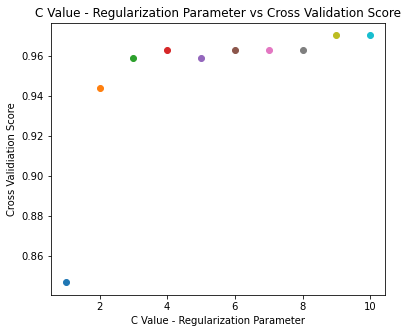

In [237]:
# finding best regularization parameter, C
best_parameter(X3_train, y3_train, SVM)

As illustrated above, the optimal C value seems to be 9 as it has the highest cross validation score. Hence, we will be using that in our model.

Our next task, and the most important, is to fit the model on our training data and evaluating its performance on the test data. We will do that below.

In [230]:
# using best C value for our SVM model
SVM = svm.SVC(C = 9)
# fitting it on training data
SVM.fit(X3_train, y3_train) 
# evaluating performance on testing data
SVM.score(X3_test, y3_test)

0.9384615384615385

It looks like our random forest model's performance on the test data was 93.8%. This means it was able to correctly classify the species of penguin 93.8 percent of the time! For the vast majority of penguins in our testing dataset, it was correctly able to identify the species.

However, it is important that we understand where our model went wrong. We will first use a confusion matrix to do this.

<AxesSubplot:xlabel='Predicted Value', ylabel='Actual Value'>

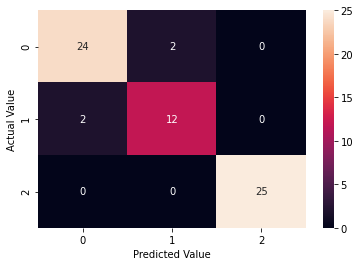

In [231]:
cm(SVM, X3_test, y3_test)

The diagonal of the matrix reprensents the numbers of correct categorization from our SVM model. And from the confusion matrix we can see there are 2+2=4 penguins we labeled incorrectly.
We can visualize this by creating a decision region plot to visualize what the model "saw" when analzying the data.
First, let us look at what the model saw on the training data.

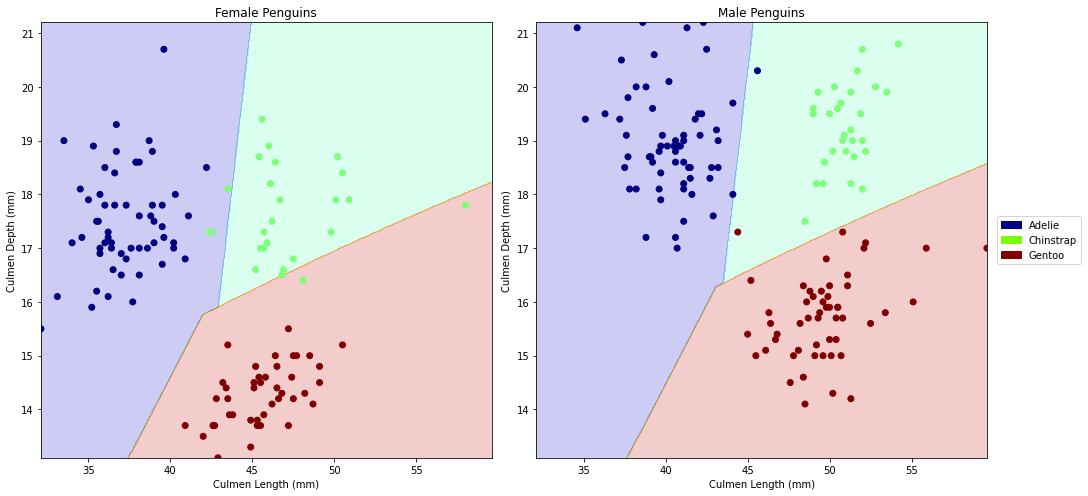

In [282]:
# decision region for training data
plot_regions(SVM, X3_train, y3_train, ['Culmen Length (mm)', 'Culmen Depth (mm)'])

The model did a pretty decent job of correctly classifying the training data; albeit with more errors than the previous two models. The model does seem to have a little bit of a hard time differentiating between Chinstrap and Adelie penguins, as illustrated by the how there are blue dots in the green region and green dots in the blue region. 

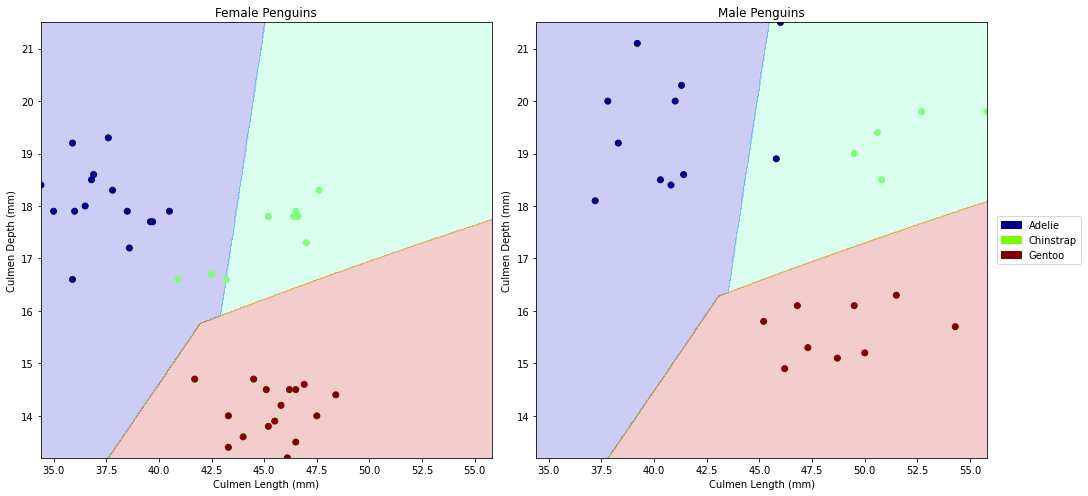

In [283]:
# decision region for testing data
plot_regions(SVM, X3_test, y3_test, ['Culmen Length (mm)', 'Culmen Depth (mm)'])

Looking at the decision region plots above, this validates what we saw in the plots for the training data. There are 2 female Chinstrap penguins mistakenly labelled as Adelie penguins, and there are two male Adelie penguins misclassified as Chinstrap penguins. 

In [244]:
# creating a table of errors
error_table(X3_test, y3_test, SVM)

,Culmen Length (mm),Culmen Depth (mm),Sex,Actual Species,Predicted Species
184,42.5,16.7,F,Chinstrap,Adelie
182,40.9,16.6,F,Chinstrap,Adelie
19,46.0,21.5,M,Adelie,Chinstrap
73,45.8,18.9,M,Adelie,Chinstrap


For the support vector machines model, we think the errors were caused for similar reasons as the K-Nearest neighbors model. Penguins 182 and 73 were also mislabelled in the K-Nearest Neighbors model, which is one thing we observed. In the case of these two penguins, their culmen lengths more closely resembled Adelie penguins, and the culmen depth was not as good of a feature to differntiate between Chinstrap and Adelie penguins. For penguins 19 and 73, two Adelie male penguins misclassified as chinstrap penguins, we think this is due to how their culmen lengths are higher than that of average male Adelie penguins (40.3 mm) and closer to that of male Chinstrap penguins (average of 51 mm). 

## Section 4: Discussion

The purpose of this project was to accurately classify the species of a penguin from the Palmer penguins dataset. When looking at our models, the Random Forest classifier with use of the features sex, culmen length, and body mass, did the best in accurately classifying the species of penguin, as it was able to do so 98.4% of the time. The K-Nearest Neigbors model with the use of the features sex, culmen length, and culmen depth did the second best, with 96.9% of penguins in the testing dataset having their species correctly identified. The Support Vector Machine model with use of features sex, culmen length, and culmen depth did the worst, with 93.9% of penguins having their species correctly identified. Overall, these are relatively good results as our models were correctly able to identify the species of penguin most of the time. 

As such, we would recommend the Random Forest classifier with a max depth of 5 with the features sex, culmen length, and body mass as this was able to most accurately predict the species of penguin. 

A possible reason for Random Forest performing better is because this method decorrelates the trees with the introduction of splitting on a random subset of features. As a result, we have a split tree that considers only a small subset of features. The decorrelation is important because it separates each tree from the features' respective errors. Each tree of a Random Forest is trained with different sets of data, which allows the different features to make decisions. Overall, since it is an ensemble "average" prediction from multiple different decision trees, the error is minimized. 

The performance of the K-Nearest-Neighbors (KNN) was also quite good. This could be explained by the fact that K-Nearest Neighbors assumes that similar things exist in close proximity, which makes it a good method for dealing with the different classification of penguins. 

Out of the three, Support Vector Machines (SVM) performed quite poorly relatively speaking. This is probably due to SVM not doing well when target classes are overlapping, which have resulted in the confusion the model made in determining whether a penguin was an Adelie or Chinstrap, since they have similar feature values. 

The performance on our models could be improved with better data. We found that most of the mistakes that the models made were Adelie penguins being classified as Chinstrap penguins and vice-versa. Hence, more data that could differentiate between these two species would improve our model’s performance. This could entail collecting more data on things like culmen length, culmen depth, and body mass for Adelie and Chinstrap penguins so that a more representative sample is created. Our models could then potentially "see" the differences between Adelie and Chinstrap penguins in a clearer manner. For example, right now, our data suggests Adelie and Chinstrap penguins have relatively similar culmen depths; more data collected on this feature could potentially show that they could have more different culmen depths. One other way would be to collect data on some feature that is very different between Adelie and Chinstrap penguins. This would be an excellent way to better predict the species of penguin as it would allow the model to see a huge difference between Adelie and Chinstrap penguins. We already saw this "in action" somewhat with Gentoo penguins as they had a very high body mass but lower culmen depth when compared to other species, allowing for all three of our models to correctly classify all of them. 

Also, of the total mistakes our models made (7 in total, 1 in Random Forest, 2 in KNN, and 4 in SVM), 4 involved female penguins, a majority. This indicates that there might be some bias in the Palmer Penguins dataset as there seems to be more data for male penguins. Having more data for female penguins would allow the model to better classify the species of penguin for females. 


To conclude, our models did a pretty good job of correctly labelling the species of penguin; however, better data could always improve the accuracy of our models. 